#### Importing Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Getting Data

In [2]:
data = pd.read_csv('/Users/msreeramulu/SWD/Python/PySimpleML/Examples/data/Houses.csv')
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757


In [3]:
dataShuff = data.sample(frac=1)
trainData = data.iloc[:20000, :] #using only 10k rows out of~20000
testData = data.iloc[20000:, :]
XTrain = trainData.iloc[:, 1:]
yTrain = trainData.iloc[:, [0]]
XTest = testData.iloc[:, 1:]
yTest = testData.iloc[:, [0]]

#### Training

In [4]:
!pip list

Package                 Version     Editable project location
----------------------- ----------- ----------------------------------------
appnope                 0.1.4
asttokens               3.0.0
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.16
decorator               5.2.1
et_xmlfile              2.0.0
executing               2.2.0
fonttools               4.59.1
ipykernel               6.30.1
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.9
matplotlib              3.10.5
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numpy                   2.3.2
openpyxl                3.1.5
packaging               25.0
pandas                  2.3.1
parso                   0.8.4
pexpect                 4.9.0
pillow                  11.3.0
pip                     25.2
platformdirs    

In [5]:
from PySimpleML.models.ANN import NeuralNetwork
houseNN = NeuralNetwork(10, 10, task=0)
houseNN.train(XTrain, yTrain, 0.01, 10)

Done Training


#### Model Evaluation

In [6]:
from PySimpleML.scores import R2Score
pred = houseNN.predict(XTest)
print(f'R2 Score: {R2Score(pred, yTest)}')

R2 Score: 0.5772629829313607


#### Plotting

NameError: name 'op' is not defined

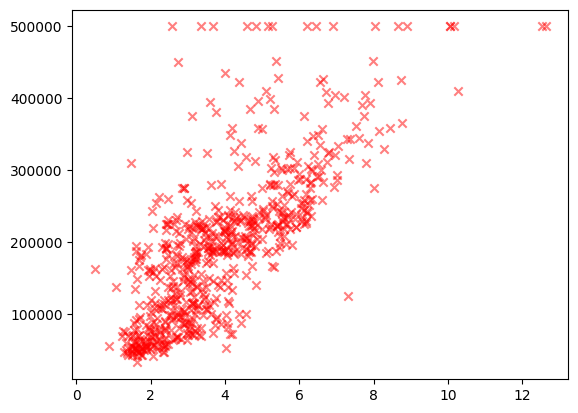

In [7]:
# plt.scatter(XTrain['Median_Income'], yTrain, c='r', alpha=0.15)
plt.scatter(XTest['Median_Income'], yTest, c='r', label='True', alpha=0.5, marker='x')
plt.scatter(op['Median_Income'], op['Median_House_ValuePred'], c='b', label='Predicted', alpha=0.2)
plt.xlabel('Median_Income')
plt.ylabel('Median_House_Value')
plt.legend()
plt.show()

In [71]:
plt.savefig('Plot')

<Figure size 640x480 with 0 Axes>